In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# Cat and Dog Classification using ResNet-KAN Method

### Description of Kolmogorov-Arnold Network (KAN)

The paper: https://arxiv.org/abs/2404.19756

The Kolmogorov-Arnold Network (KAN) is a type of artificial neural network based on the Kolmogorov-Arnold Representation Theorem. This network has distinct characteristics in its structure and operation, differing from Multi-Layer Perceptrons (MLPs). KAN features the following:

1. **Kolmogorov-Arnold Representation Theorem**:
   
 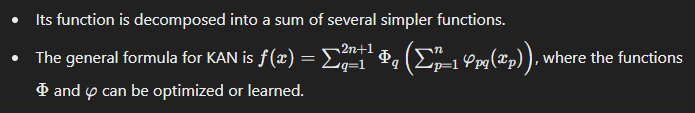
   
2. **Learnable Activations on Edges**:
   - Unlike MLPs, which have fixed activations on nodes, KAN has learnable activations on edges.

3. **Sum Operation on Nodes**:
   - KAN combines the results of several sum operations performed on nodes.

### Comparison Between KAN and MLP

#### Similarities
- **Both models** can be used for universal approximation of continuous functions.
- **Both models** consist of layers that can be combined to form deep networks.

#### Differences
1. **Activation Structure**:
   - **MLP**: Uses fixed activation functions on nodes.
   - **KAN**: Uses learnable activation functions on edges.

2. **Learning and Operation Locations**:
   - **MLP**: Learnable weights are on the edges between layers, with fixed activation functions.
   - **KAN**: The activation functions themselves are on the edges and learnable, with sum operations on nodes.

3. **Mathematical Formulas**:

   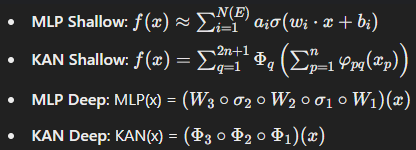

4. **Model Visualization**:
   - **MLP Shallow**: Depicted as a network with a single layer of fixed activations on nodes and weights on edges.
   - **KAN Shallow**: Depicted as a network with learnable functions on edges and sum operations on nodes.
   - **MLP Deep**: A network with multiple layers, each layer having weights and fixed activation functions.
   - **KAN Deep**: A network with multiple layers, but the learnable functions are on the edges.

### Conclusion
KAN and MLP are two different approaches to building neural networks with universal approximation capabilities. KAN offers higher flexibility in terms of having learnable activation functions on edges compared to MLPs, which use fixed activation functions on nodes. This makes KAN more adaptive in some cases, although with additional complexity in learning.



<p align="center">
  <a href="url"><img src="https://www.americanhumane.org/app/uploads/2016/08/shutterstock_162633491.jpg" align="middle" height="383" width="640" ></a>
</p>

In [2]:
!nvidia-smi

Mon Jun 17 23:17:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Checking the Directory Cat and Dog

In [3]:
!ls '/kaggle/input/dog-vs-cat-classification'

sample_submission.csv  test  train


## Spliting data training and validation

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Directory with our training cat pictures
train_cat_dir = os.path.join('/kaggle/input/dog-vs-cat-classification/train/train/cats')
# Directory with our training dog pictures
train_dog_dir = os.path.join('/kaggle/input/dog-vs-cat-classification/train/train/dogs')

# Create output directories for training and validation data
output_base_dir = './split_data'
train_cat_output_dir = os.path.join(output_base_dir, 'train/cats')
train_dog_output_dir = os.path.join(output_base_dir, 'train/dogs')
validation_cat_output_dir = os.path.join(output_base_dir, 'validation/cats')
validation_dog_output_dir = os.path.join(output_base_dir, 'validation/dogs')

os.makedirs(train_cat_output_dir, exist_ok=True)
os.makedirs(train_dog_output_dir, exist_ok=True)
os.makedirs(validation_cat_output_dir, exist_ok=True)
os.makedirs(validation_dog_output_dir, exist_ok=True)

# List all cat and dog images
cat_images = os.listdir(train_cat_dir)
dog_images = os.listdir(train_dog_dir)

# Split 2500 images for validation, remaining 10000 for training
cat_train, cat_val = train_test_split(cat_images, test_size=2500, random_state=42)
dog_train, dog_val = train_test_split(dog_images, test_size=2500, random_state=42)

# Move cat images to the appropriate folders
for img in cat_train:
    src = os.path.join(train_cat_dir, img)
    dst = os.path.join(train_cat_output_dir, img)
    shutil.copy(src, dst)

for img in cat_val:
    src = os.path.join(train_cat_dir, img)
    dst = os.path.join(validation_cat_output_dir, img)
    shutil.copy(src, dst)

# Move dog images to the appropriate folders
for img in dog_train:
    src = os.path.join(train_dog_dir, img)
    dst = os.path.join(train_dog_output_dir, img)
    shutil.copy(src, dst)

for img in dog_val:
    src = os.path.join(train_dog_dir, img)
    dst = os.path.join(validation_dog_output_dir, img)
    shutil.copy(src, dst)

# Verify the split
print(f"Total training cat images: {len(os.listdir(train_cat_output_dir))}")
print(f"Total training dog images: {len(os.listdir(train_dog_output_dir))}")
print(f"Total validation cat images: {len(os.listdir(validation_cat_output_dir))}")
print(f"Total validation dog images: {len(os.listdir(validation_dog_output_dir))}")


Total training cat images: 10000
Total training dog images: 10000
Total validation cat images: 2500
Total validation dog images: 2500


In [5]:
!ls './split_data'

train  validation


In [6]:
train_cat_names = os.listdir(train_cat_output_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_output_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(validation_cat_output_dir)
print(validation_cat_names[:10])

validation_dog_names = os.listdir(validation_dog_output_dir)
print(validation_dog_names[:10])

['cat.7754.jpg', 'cat.1927.jpg', 'cat.1417.jpg', 'cat.2874.jpg', 'cat.4105.jpg', 'cat.7550.jpg', 'cat.10587.jpg', 'cat.7107.jpg', 'cat.2610.jpg', 'cat.9219.jpg']
['dog.1671.jpg', 'dog.5792.jpg', 'dog.161.jpg', 'dog.5036.jpg', 'dog.5058.jpg', 'dog.2872.jpg', 'dog.12355.jpg', 'dog.3077.jpg', 'dog.9381.jpg', 'dog.2244.jpg']
['cat.9661.jpg', 'cat.10403.jpg', 'cat.10367.jpg', 'cat.6380.jpg', 'cat.6761.jpg', 'cat.2336.jpg', 'cat.9902.jpg', 'cat.11378.jpg', 'cat.11756.jpg', 'cat.5623.jpg']
['dog.4940.jpg', 'dog.6888.jpg', 'dog.12186.jpg', 'dog.6058.jpg', 'dog.9555.jpg', 'dog.1129.jpg', 'dog.256.jpg', 'dog.9480.jpg', 'dog.7343.jpg', 'dog.3333.jpg']


## Dataset exploration

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

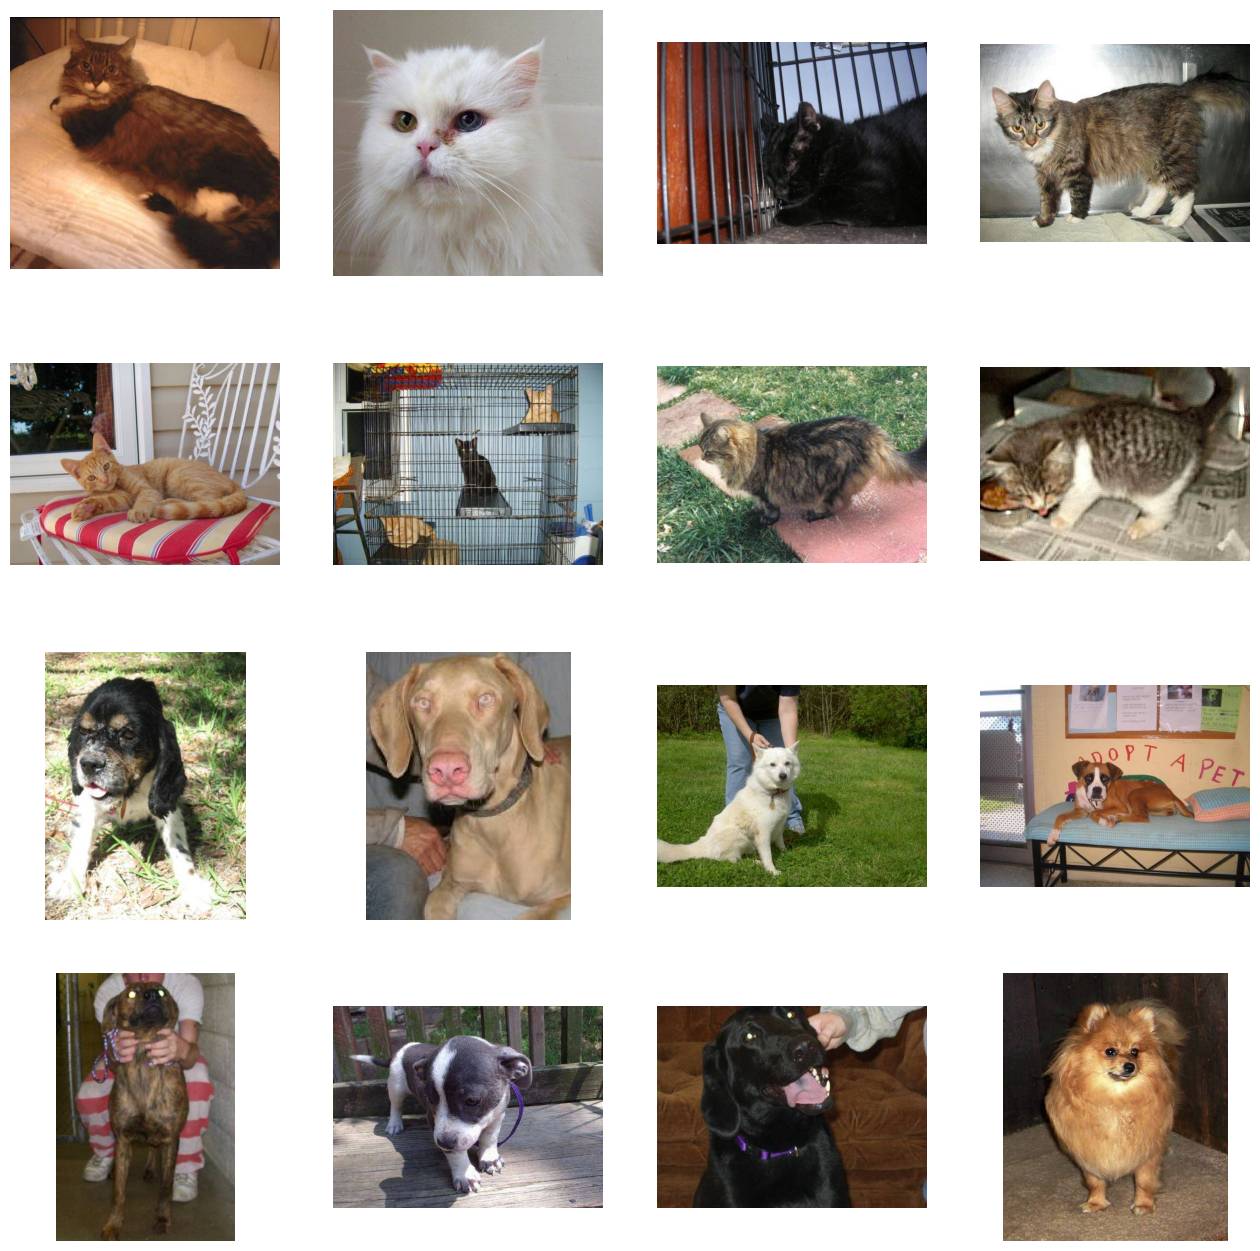

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pic = [os.path.join(train_cat_output_dir, fname)
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pic = [os.path.join(train_dog_output_dir, fname)
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Install library

In [9]:
!pip install -q torchsummary

## Import Library

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
from torchsummary import summary
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import OneCycleLR
from tqdm.notebook import tqdm

### 1. Definition of KANLinear
  - This definition follows the provided source and is used in the CNN-KAN model.

  <p align="center">
  <a href="url"><img src="https://www.marktechpost.com/wp-content/uploads/2024/05/Screenshot-2024-05-04-at-12.59.57-PM.png" align="middle" height="383" width="640" ></a>
</p>

KAN vs MLP Complexity (please correct if there are any errors):

Big O notation measures the time or space complexity of an algorithm in terms of its input. To compare the memory and performance requirements between the Kolmogorov-Arnold Network (KAN) and Multi-Layer Perceptron (MLP), we can look at the components that affect memory usage and computational time for both algorithms.

### Multi-Layer Perceptron (MLP)

MLP usually consists of several layers of neurons, where each neuron in one layer is connected to every neuron in the next layer.

- **Time Complexity (Training):** O(N * M * L * E)
  - N: Number of samples in the dataset
  - M: Number of neurons per layer
  - L: Number of layers
  - E: Number of epochs

- **Space Complexity:** O(M * L + N * F)
  - M: Number of neurons per layer
  - L: Number of layers
  - N: Number of samples in the dataset
  - F: Dimension of input features

### Kolmogorov-Arnold Network (KAN)

KAN uses learnable activation functions at each edge and summation operations at nodes, adding complexity to the model.

- **Time Complexity (Training):** O(N * (M^2) * L * E)
  - N: Number of samples in the dataset
  - M: Number of neurons per layer (since the activation functions are learnable at each edge, there is additional complexity here)
  - L: Number of layers
  - E: Number of epochs

- **Space Complexity:** O(M^2 * L + N * F)
  - M: Number of neurons per layer (with learnable activation functions at each edge, memory requirements increase)
  - L: Number of layers
  - N: Number of samples in the dataset
  - F: Dimension of input features

### Conclusion

From the analysis above, it can be concluded that KAN has higher complexity compared to MLP in terms of both time and space.

1. **Time Complexity:**
   - MLP: O(N * M * L * E)
   - KAN: O(N * M^2 * L * E)

2. **Space Complexity:**
   - MLP: O(M * L + N * F)
   - KAN: O(M^2 * L + N * F)

It can be seen that KAN requires more memory (RAM) during training because it has learnable activation functions at each edge, which significantly increases the number of parameters that need to be stored and processed.

### Class KANLinier

[1] Reference: KAN: https://github.com/Blealtan/efficient-kan/blob/master/src/efficient_kan/kan.py

In [11]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 1 / 2) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


## 2. Model CNNKAN

Reference: CNN-KAN: https://github.com/jakariaemon/CNN-KAN 

  # Basics CNN model for Cat and Dog Classifications with KANLinear
  
    class CNNKAN(nn.Module):
        def __init__(self):
            super(CNNKAN, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  
            self.pool1 = nn.MaxPool2d(2)
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
            self.pool2 = nn.MaxPool2d(2)
            self.kan1 = KANLinear(64 * 8 * 8, 256)  
            self.kan2 = KANLinear(256, 100)

        def forward(self, x):
            x = F.selu(self.conv1(x))
            x = self.pool1(x)
            x = F.selu(self.conv2(x))
            x = self.pool2(x)
            x = x.view(x.size(0), -1)
            x = self.kan1(x)
            x = self.kan2(x)
            return x

### Model VGG16-KAN 

Reference KANVGG16 architectures from: https://www.linkedin.com/posts/damienbenveniste_this-is-a-pure-kolmogorovarnold-kan-convolutional-activity-7193403017008680960-FOHW?utm_source=share&utm_medium=member_android

In [12]:
# Define the model
class KANVGG16(nn.Module):
    def __init__(self, num_classes=1):  # For binary classification (cats and dogs)
        super(KANVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),  # Added Batch Normalization

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(128),  # Added Batch Normalization

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(256),  # Added Batch Normalization

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),  # Added Batch Normalization

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),  # Added Batch Normalization
        )
        self.classifier = nn.Sequential(
            KANLinear(512 * 7 * 7, 2048),  # Adjusted for input size 224x224
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Increased Dropout
            KANLinear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Increased Dropout
            KANLinear(2048, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

## 3. Creating PyTorch Dataset and DataLoader
  - Use transformations and PyTorch DataLoader:

In [13]:
# Directory paths
train_dir = './split_data/train'
val_dir = './split_data/validation'

# Define transformations for the training data
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# For validation data, we resize to 224x224 and then just convert to tensor and normalize
transform_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

batch_size = 32

# Create the datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform_val)

# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


## 4. Training dan Evaluasi Model
  - Bagian ini mendefinisikan loop training dan evaluasi model. Clear Gradients dan Kosongkan Cache

In [14]:
# Clear CUDA Cache
torch.cuda.empty_cache()

KANVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(i

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 1 [0/20000 (0%)]	Loss: 0.624266
Train Epoch: 1 [320/20000 (2%)]	Loss: 0.652847
Train Epoch: 1 [640/20000 (3%)]	Loss: 0.522426
Train Epoch: 1 [960/20000 (5%)]	Loss: 0.705827
Train Epoch: 1 [1280/20000 (6%)]	Loss: 0.720952
Train Epoch: 1 [1600/20000 (8%)]	Loss: 0.473126
Train Epoch: 1 [1920/20000 (10%)]	Loss: 0.473908
Train Epoch: 1 [2240/20000 (11%)]	Loss: 0.555806
Train Epoch: 1 [2560/20000 (13%)]	Loss: 0.772865
Train Epoch: 1 [2880/20000 (14%)]	Loss: 0.556998
Train Epoch: 1 [3200/20000 (16%)]	Loss: 0.575990
Train Epoch: 1 [3520/20000 (18%)]	Loss: 0.627129
Train Epoch: 1 [3840/20000 (19%)]	Loss: 0.705999
Train Epoch: 1 [4160/20000 (21%)]	Loss: 0.466036
Train Epoch: 1 [4480/20000 (22%)]	Loss: 0.782618
Train Epoch: 1 [4800/20000 (24%)]	Loss: 0.412309
Train Epoch: 1 [5120/20000 (26%)]	Loss: 0.615298
Train Epoch: 1 [5440/20000 (27%)]	Loss: 0.656129
Train Epoch: 1 [5760/20000 (29%)]	Loss: 0.573887
Train Epoch: 1 [6080/20000 (30%)]	Loss: 0.658965
Train Epoch: 1 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 2 [0/20000 (0%)]	Loss: 0.524352
Train Epoch: 2 [320/20000 (2%)]	Loss: 0.471221
Train Epoch: 2 [640/20000 (3%)]	Loss: 0.460596
Train Epoch: 2 [960/20000 (5%)]	Loss: 0.414521
Train Epoch: 2 [1280/20000 (6%)]	Loss: 0.595448
Train Epoch: 2 [1600/20000 (8%)]	Loss: 0.468115
Train Epoch: 2 [1920/20000 (10%)]	Loss: 0.445988
Train Epoch: 2 [2240/20000 (11%)]	Loss: 0.492656
Train Epoch: 2 [2560/20000 (13%)]	Loss: 0.495761
Train Epoch: 2 [2880/20000 (14%)]	Loss: 0.485525
Train Epoch: 2 [3200/20000 (16%)]	Loss: 0.314669
Train Epoch: 2 [3520/20000 (18%)]	Loss: 0.381598
Train Epoch: 2 [3840/20000 (19%)]	Loss: 0.465020
Train Epoch: 2 [4160/20000 (21%)]	Loss: 0.669341
Train Epoch: 2 [4480/20000 (22%)]	Loss: 0.457014
Train Epoch: 2 [4800/20000 (24%)]	Loss: 0.395783
Train Epoch: 2 [5120/20000 (26%)]	Loss: 0.573023
Train Epoch: 2 [5440/20000 (27%)]	Loss: 0.269549
Train Epoch: 2 [5760/20000 (29%)]	Loss: 0.524093
Train Epoch: 2 [6080/20000 (30%)]	Loss: 0.437173
Train Epoch: 2 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 3 [0/20000 (0%)]	Loss: 0.614406
Train Epoch: 3 [320/20000 (2%)]	Loss: 0.409809
Train Epoch: 3 [640/20000 (3%)]	Loss: 0.296571
Train Epoch: 3 [960/20000 (5%)]	Loss: 0.543706
Train Epoch: 3 [1280/20000 (6%)]	Loss: 0.352246
Train Epoch: 3 [1600/20000 (8%)]	Loss: 0.628642
Train Epoch: 3 [1920/20000 (10%)]	Loss: 0.315057
Train Epoch: 3 [2240/20000 (11%)]	Loss: 0.365294
Train Epoch: 3 [2560/20000 (13%)]	Loss: 0.452884
Train Epoch: 3 [2880/20000 (14%)]	Loss: 0.408865
Train Epoch: 3 [3200/20000 (16%)]	Loss: 0.424164
Train Epoch: 3 [3520/20000 (18%)]	Loss: 0.300058
Train Epoch: 3 [3840/20000 (19%)]	Loss: 0.608693
Train Epoch: 3 [4160/20000 (21%)]	Loss: 0.379510
Train Epoch: 3 [4480/20000 (22%)]	Loss: 0.546494
Train Epoch: 3 [4800/20000 (24%)]	Loss: 0.524321
Train Epoch: 3 [5120/20000 (26%)]	Loss: 0.235583
Train Epoch: 3 [5440/20000 (27%)]	Loss: 0.565361
Train Epoch: 3 [5760/20000 (29%)]	Loss: 0.484342
Train Epoch: 3 [6080/20000 (30%)]	Loss: 0.503477
Train Epoch: 3 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 4 [0/20000 (0%)]	Loss: 0.401800
Train Epoch: 4 [320/20000 (2%)]	Loss: 0.375710
Train Epoch: 4 [640/20000 (3%)]	Loss: 0.335145
Train Epoch: 4 [960/20000 (5%)]	Loss: 0.283860
Train Epoch: 4 [1280/20000 (6%)]	Loss: 0.248593
Train Epoch: 4 [1600/20000 (8%)]	Loss: 0.517618
Train Epoch: 4 [1920/20000 (10%)]	Loss: 0.364383
Train Epoch: 4 [2240/20000 (11%)]	Loss: 0.341413
Train Epoch: 4 [2560/20000 (13%)]	Loss: 0.614351
Train Epoch: 4 [2880/20000 (14%)]	Loss: 0.318382
Train Epoch: 4 [3200/20000 (16%)]	Loss: 0.426910
Train Epoch: 4 [3520/20000 (18%)]	Loss: 0.292848
Train Epoch: 4 [3840/20000 (19%)]	Loss: 0.310262
Train Epoch: 4 [4160/20000 (21%)]	Loss: 0.264031
Train Epoch: 4 [4480/20000 (22%)]	Loss: 0.518631
Train Epoch: 4 [4800/20000 (24%)]	Loss: 0.336448
Train Epoch: 4 [5120/20000 (26%)]	Loss: 0.148504
Train Epoch: 4 [5440/20000 (27%)]	Loss: 0.336484
Train Epoch: 4 [5760/20000 (29%)]	Loss: 0.225524
Train Epoch: 4 [6080/20000 (30%)]	Loss: 0.406969
Train Epoch: 4 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 5 [0/20000 (0%)]	Loss: 0.380910
Train Epoch: 5 [320/20000 (2%)]	Loss: 0.296060
Train Epoch: 5 [640/20000 (3%)]	Loss: 0.418287
Train Epoch: 5 [960/20000 (5%)]	Loss: 0.606390
Train Epoch: 5 [1280/20000 (6%)]	Loss: 0.375663
Train Epoch: 5 [1600/20000 (8%)]	Loss: 0.302371
Train Epoch: 5 [1920/20000 (10%)]	Loss: 0.458090
Train Epoch: 5 [2240/20000 (11%)]	Loss: 0.373534
Train Epoch: 5 [2560/20000 (13%)]	Loss: 0.486032
Train Epoch: 5 [2880/20000 (14%)]	Loss: 0.280912
Train Epoch: 5 [3200/20000 (16%)]	Loss: 0.561433
Train Epoch: 5 [3520/20000 (18%)]	Loss: 0.388018
Train Epoch: 5 [3840/20000 (19%)]	Loss: 0.268583
Train Epoch: 5 [4160/20000 (21%)]	Loss: 0.280800
Train Epoch: 5 [4480/20000 (22%)]	Loss: 0.259917
Train Epoch: 5 [4800/20000 (24%)]	Loss: 0.485939
Train Epoch: 5 [5120/20000 (26%)]	Loss: 0.595583
Train Epoch: 5 [5440/20000 (27%)]	Loss: 0.336233
Train Epoch: 5 [5760/20000 (29%)]	Loss: 0.249974
Train Epoch: 5 [6080/20000 (30%)]	Loss: 0.289476
Train Epoch: 5 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 6 [0/20000 (0%)]	Loss: 0.378805
Train Epoch: 6 [320/20000 (2%)]	Loss: 0.235328
Train Epoch: 6 [640/20000 (3%)]	Loss: 0.305278
Train Epoch: 6 [960/20000 (5%)]	Loss: 0.320281
Train Epoch: 6 [1280/20000 (6%)]	Loss: 0.311292
Train Epoch: 6 [1600/20000 (8%)]	Loss: 0.183483
Train Epoch: 6 [1920/20000 (10%)]	Loss: 0.293829
Train Epoch: 6 [2240/20000 (11%)]	Loss: 0.485898
Train Epoch: 6 [2560/20000 (13%)]	Loss: 0.263368
Train Epoch: 6 [2880/20000 (14%)]	Loss: 0.716427
Train Epoch: 6 [3200/20000 (16%)]	Loss: 0.259503
Train Epoch: 6 [3520/20000 (18%)]	Loss: 0.502535
Train Epoch: 6 [3840/20000 (19%)]	Loss: 0.371032
Train Epoch: 6 [4160/20000 (21%)]	Loss: 0.456639
Train Epoch: 6 [4480/20000 (22%)]	Loss: 0.189882
Train Epoch: 6 [4800/20000 (24%)]	Loss: 0.177851
Train Epoch: 6 [5120/20000 (26%)]	Loss: 0.327131
Train Epoch: 6 [5440/20000 (27%)]	Loss: 0.400621
Train Epoch: 6 [5760/20000 (29%)]	Loss: 0.333510
Train Epoch: 6 [6080/20000 (30%)]	Loss: 0.273910
Train Epoch: 6 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 7 [0/20000 (0%)]	Loss: 0.399113
Train Epoch: 7 [320/20000 (2%)]	Loss: 0.306015
Train Epoch: 7 [640/20000 (3%)]	Loss: 0.356401
Train Epoch: 7 [960/20000 (5%)]	Loss: 0.280480
Train Epoch: 7 [1280/20000 (6%)]	Loss: 0.211259
Train Epoch: 7 [1600/20000 (8%)]	Loss: 0.238535
Train Epoch: 7 [1920/20000 (10%)]	Loss: 0.280372
Train Epoch: 7 [2240/20000 (11%)]	Loss: 0.173495
Train Epoch: 7 [2560/20000 (13%)]	Loss: 0.404747
Train Epoch: 7 [2880/20000 (14%)]	Loss: 0.653737
Train Epoch: 7 [3200/20000 (16%)]	Loss: 0.470176
Train Epoch: 7 [3520/20000 (18%)]	Loss: 0.229162
Train Epoch: 7 [3840/20000 (19%)]	Loss: 0.406127
Train Epoch: 7 [4160/20000 (21%)]	Loss: 0.189174
Train Epoch: 7 [4480/20000 (22%)]	Loss: 0.239875
Train Epoch: 7 [4800/20000 (24%)]	Loss: 0.184091
Train Epoch: 7 [5120/20000 (26%)]	Loss: 0.169299
Train Epoch: 7 [5440/20000 (27%)]	Loss: 0.513695
Train Epoch: 7 [5760/20000 (29%)]	Loss: 0.445353
Train Epoch: 7 [6080/20000 (30%)]	Loss: 0.382762
Train Epoch: 7 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 8 [0/20000 (0%)]	Loss: 0.310603
Train Epoch: 8 [320/20000 (2%)]	Loss: 0.320375
Train Epoch: 8 [640/20000 (3%)]	Loss: 0.312893
Train Epoch: 8 [960/20000 (5%)]	Loss: 0.261260
Train Epoch: 8 [1280/20000 (6%)]	Loss: 0.525609
Train Epoch: 8 [1600/20000 (8%)]	Loss: 0.222985
Train Epoch: 8 [1920/20000 (10%)]	Loss: 0.277189
Train Epoch: 8 [2240/20000 (11%)]	Loss: 0.252265
Train Epoch: 8 [2560/20000 (13%)]	Loss: 0.253058
Train Epoch: 8 [2880/20000 (14%)]	Loss: 0.224025
Train Epoch: 8 [3200/20000 (16%)]	Loss: 0.144005
Train Epoch: 8 [3520/20000 (18%)]	Loss: 0.219375
Train Epoch: 8 [3840/20000 (19%)]	Loss: 0.125841
Train Epoch: 8 [4160/20000 (21%)]	Loss: 0.165038
Train Epoch: 8 [4480/20000 (22%)]	Loss: 0.167136
Train Epoch: 8 [4800/20000 (24%)]	Loss: 0.337751
Train Epoch: 8 [5120/20000 (26%)]	Loss: 0.266652
Train Epoch: 8 [5440/20000 (27%)]	Loss: 0.238031
Train Epoch: 8 [5760/20000 (29%)]	Loss: 0.344037
Train Epoch: 8 [6080/20000 (30%)]	Loss: 0.331526
Train Epoch: 8 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 9 [0/20000 (0%)]	Loss: 0.189395
Train Epoch: 9 [320/20000 (2%)]	Loss: 0.198798
Train Epoch: 9 [640/20000 (3%)]	Loss: 0.131373
Train Epoch: 9 [960/20000 (5%)]	Loss: 0.178467
Train Epoch: 9 [1280/20000 (6%)]	Loss: 0.074777
Train Epoch: 9 [1600/20000 (8%)]	Loss: 0.156017
Train Epoch: 9 [1920/20000 (10%)]	Loss: 0.303074
Train Epoch: 9 [2240/20000 (11%)]	Loss: 0.236744
Train Epoch: 9 [2560/20000 (13%)]	Loss: 0.252143
Train Epoch: 9 [2880/20000 (14%)]	Loss: 0.296955
Train Epoch: 9 [3200/20000 (16%)]	Loss: 0.251771
Train Epoch: 9 [3520/20000 (18%)]	Loss: 0.162451
Train Epoch: 9 [3840/20000 (19%)]	Loss: 0.215799
Train Epoch: 9 [4160/20000 (21%)]	Loss: 0.440874
Train Epoch: 9 [4480/20000 (22%)]	Loss: 0.145995
Train Epoch: 9 [4800/20000 (24%)]	Loss: 0.257600
Train Epoch: 9 [5120/20000 (26%)]	Loss: 0.270569
Train Epoch: 9 [5440/20000 (27%)]	Loss: 0.324920
Train Epoch: 9 [5760/20000 (29%)]	Loss: 0.258992
Train Epoch: 9 [6080/20000 (30%)]	Loss: 0.258135
Train Epoch: 9 [6400/20000 (32%)

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 10 [0/20000 (0%)]	Loss: 0.251718
Train Epoch: 10 [320/20000 (2%)]	Loss: 0.345176
Train Epoch: 10 [640/20000 (3%)]	Loss: 0.330797
Train Epoch: 10 [960/20000 (5%)]	Loss: 0.200336
Train Epoch: 10 [1280/20000 (6%)]	Loss: 0.244425
Train Epoch: 10 [1600/20000 (8%)]	Loss: 0.277519
Train Epoch: 10 [1920/20000 (10%)]	Loss: 0.175556
Train Epoch: 10 [2240/20000 (11%)]	Loss: 0.259492
Train Epoch: 10 [2560/20000 (13%)]	Loss: 0.272034
Train Epoch: 10 [2880/20000 (14%)]	Loss: 0.337046
Train Epoch: 10 [3200/20000 (16%)]	Loss: 0.276932
Train Epoch: 10 [3520/20000 (18%)]	Loss: 0.150004
Train Epoch: 10 [3840/20000 (19%)]	Loss: 0.272833
Train Epoch: 10 [4160/20000 (21%)]	Loss: 0.378941
Train Epoch: 10 [4480/20000 (22%)]	Loss: 0.180454
Train Epoch: 10 [4800/20000 (24%)]	Loss: 0.230558
Train Epoch: 10 [5120/20000 (26%)]	Loss: 0.510547
Train Epoch: 10 [5440/20000 (27%)]	Loss: 0.145225
Train Epoch: 10 [5760/20000 (29%)]	Loss: 0.269614
Train Epoch: 10 [6080/20000 (30%)]	Loss: 0.129747
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 11 [0/20000 (0%)]	Loss: 0.198597
Train Epoch: 11 [320/20000 (2%)]	Loss: 0.226237
Train Epoch: 11 [640/20000 (3%)]	Loss: 0.278985
Train Epoch: 11 [960/20000 (5%)]	Loss: 0.386616
Train Epoch: 11 [1280/20000 (6%)]	Loss: 0.180328
Train Epoch: 11 [1600/20000 (8%)]	Loss: 0.203333
Train Epoch: 11 [1920/20000 (10%)]	Loss: 0.165589
Train Epoch: 11 [2240/20000 (11%)]	Loss: 0.460162
Train Epoch: 11 [2560/20000 (13%)]	Loss: 0.176379
Train Epoch: 11 [2880/20000 (14%)]	Loss: 0.122919
Train Epoch: 11 [3200/20000 (16%)]	Loss: 0.233018
Train Epoch: 11 [3520/20000 (18%)]	Loss: 0.184751
Train Epoch: 11 [3840/20000 (19%)]	Loss: 0.123916
Train Epoch: 11 [4160/20000 (21%)]	Loss: 0.189251
Train Epoch: 11 [4480/20000 (22%)]	Loss: 0.254428
Train Epoch: 11 [4800/20000 (24%)]	Loss: 0.216048
Train Epoch: 11 [5120/20000 (26%)]	Loss: 0.320057
Train Epoch: 11 [5440/20000 (27%)]	Loss: 0.160213
Train Epoch: 11 [5760/20000 (29%)]	Loss: 0.084197
Train Epoch: 11 [6080/20000 (30%)]	Loss: 0.400038
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 12 [0/20000 (0%)]	Loss: 0.175412
Train Epoch: 12 [320/20000 (2%)]	Loss: 0.236334
Train Epoch: 12 [640/20000 (3%)]	Loss: 0.329901
Train Epoch: 12 [960/20000 (5%)]	Loss: 0.311906
Train Epoch: 12 [1280/20000 (6%)]	Loss: 0.185925
Train Epoch: 12 [1600/20000 (8%)]	Loss: 0.300514
Train Epoch: 12 [1920/20000 (10%)]	Loss: 0.246260
Train Epoch: 12 [2240/20000 (11%)]	Loss: 0.098608
Train Epoch: 12 [2560/20000 (13%)]	Loss: 0.208090
Train Epoch: 12 [2880/20000 (14%)]	Loss: 0.198106
Train Epoch: 12 [3200/20000 (16%)]	Loss: 0.490321
Train Epoch: 12 [3520/20000 (18%)]	Loss: 0.117608
Train Epoch: 12 [3840/20000 (19%)]	Loss: 0.418593
Train Epoch: 12 [4160/20000 (21%)]	Loss: 0.422684
Train Epoch: 12 [4480/20000 (22%)]	Loss: 0.131950
Train Epoch: 12 [4800/20000 (24%)]	Loss: 0.284034
Train Epoch: 12 [5120/20000 (26%)]	Loss: 0.248858
Train Epoch: 12 [5440/20000 (27%)]	Loss: 0.252206
Train Epoch: 12 [5760/20000 (29%)]	Loss: 0.299432
Train Epoch: 12 [6080/20000 (30%)]	Loss: 0.197186
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 13 [0/20000 (0%)]	Loss: 0.203616
Train Epoch: 13 [320/20000 (2%)]	Loss: 0.197961
Train Epoch: 13 [640/20000 (3%)]	Loss: 0.302402
Train Epoch: 13 [960/20000 (5%)]	Loss: 0.184495
Train Epoch: 13 [1280/20000 (6%)]	Loss: 0.140150
Train Epoch: 13 [1600/20000 (8%)]	Loss: 0.237093
Train Epoch: 13 [1920/20000 (10%)]	Loss: 0.379223
Train Epoch: 13 [2240/20000 (11%)]	Loss: 0.153648
Train Epoch: 13 [2560/20000 (13%)]	Loss: 0.197489
Train Epoch: 13 [2880/20000 (14%)]	Loss: 0.102003
Train Epoch: 13 [3200/20000 (16%)]	Loss: 0.259881
Train Epoch: 13 [3520/20000 (18%)]	Loss: 0.176218
Train Epoch: 13 [3840/20000 (19%)]	Loss: 0.134509
Train Epoch: 13 [4160/20000 (21%)]	Loss: 0.223793
Train Epoch: 13 [4480/20000 (22%)]	Loss: 0.241601
Train Epoch: 13 [4800/20000 (24%)]	Loss: 0.393745
Train Epoch: 13 [5120/20000 (26%)]	Loss: 0.205585
Train Epoch: 13 [5440/20000 (27%)]	Loss: 0.123320
Train Epoch: 13 [5760/20000 (29%)]	Loss: 0.170842
Train Epoch: 13 [6080/20000 (30%)]	Loss: 0.438319
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 14 [0/20000 (0%)]	Loss: 0.193796
Train Epoch: 14 [320/20000 (2%)]	Loss: 0.098355
Train Epoch: 14 [640/20000 (3%)]	Loss: 0.203016
Train Epoch: 14 [960/20000 (5%)]	Loss: 0.239957
Train Epoch: 14 [1280/20000 (6%)]	Loss: 0.219733
Train Epoch: 14 [1600/20000 (8%)]	Loss: 0.394474
Train Epoch: 14 [1920/20000 (10%)]	Loss: 0.223439
Train Epoch: 14 [2240/20000 (11%)]	Loss: 0.203282
Train Epoch: 14 [2560/20000 (13%)]	Loss: 0.127487
Train Epoch: 14 [2880/20000 (14%)]	Loss: 0.236357
Train Epoch: 14 [3200/20000 (16%)]	Loss: 0.378641
Train Epoch: 14 [3520/20000 (18%)]	Loss: 0.256833
Train Epoch: 14 [3840/20000 (19%)]	Loss: 0.165652
Train Epoch: 14 [4160/20000 (21%)]	Loss: 0.357843
Train Epoch: 14 [4480/20000 (22%)]	Loss: 0.172024
Train Epoch: 14 [4800/20000 (24%)]	Loss: 0.236969
Train Epoch: 14 [5120/20000 (26%)]	Loss: 0.208866
Train Epoch: 14 [5440/20000 (27%)]	Loss: 0.236044
Train Epoch: 14 [5760/20000 (29%)]	Loss: 0.237156
Train Epoch: 14 [6080/20000 (30%)]	Loss: 0.266821
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 15 [0/20000 (0%)]	Loss: 0.188006
Train Epoch: 15 [320/20000 (2%)]	Loss: 0.241265
Train Epoch: 15 [640/20000 (3%)]	Loss: 0.161322
Train Epoch: 15 [960/20000 (5%)]	Loss: 0.200660
Train Epoch: 15 [1280/20000 (6%)]	Loss: 0.151729
Train Epoch: 15 [1600/20000 (8%)]	Loss: 0.218085
Train Epoch: 15 [1920/20000 (10%)]	Loss: 0.198076
Train Epoch: 15 [2240/20000 (11%)]	Loss: 0.155071
Train Epoch: 15 [2560/20000 (13%)]	Loss: 0.287991
Train Epoch: 15 [2880/20000 (14%)]	Loss: 0.178794
Train Epoch: 15 [3200/20000 (16%)]	Loss: 0.234526
Train Epoch: 15 [3520/20000 (18%)]	Loss: 0.183936
Train Epoch: 15 [3840/20000 (19%)]	Loss: 0.156356
Train Epoch: 15 [4160/20000 (21%)]	Loss: 0.155870
Train Epoch: 15 [4480/20000 (22%)]	Loss: 0.164574
Train Epoch: 15 [4800/20000 (24%)]	Loss: 0.126332
Train Epoch: 15 [5120/20000 (26%)]	Loss: 0.134116
Train Epoch: 15 [5440/20000 (27%)]	Loss: 0.182906
Train Epoch: 15 [5760/20000 (29%)]	Loss: 0.172951
Train Epoch: 15 [6080/20000 (30%)]	Loss: 0.307449
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 16 [0/20000 (0%)]	Loss: 0.143509
Train Epoch: 16 [320/20000 (2%)]	Loss: 0.399582
Train Epoch: 16 [640/20000 (3%)]	Loss: 0.263759
Train Epoch: 16 [960/20000 (5%)]	Loss: 0.124821
Train Epoch: 16 [1280/20000 (6%)]	Loss: 0.086331
Train Epoch: 16 [1600/20000 (8%)]	Loss: 0.172612
Train Epoch: 16 [1920/20000 (10%)]	Loss: 0.276537
Train Epoch: 16 [2240/20000 (11%)]	Loss: 0.292821
Train Epoch: 16 [2560/20000 (13%)]	Loss: 0.270554
Train Epoch: 16 [2880/20000 (14%)]	Loss: 0.531140
Train Epoch: 16 [3200/20000 (16%)]	Loss: 0.121039
Train Epoch: 16 [3520/20000 (18%)]	Loss: 0.157792
Train Epoch: 16 [3840/20000 (19%)]	Loss: 0.301786
Train Epoch: 16 [4160/20000 (21%)]	Loss: 0.108680
Train Epoch: 16 [4480/20000 (22%)]	Loss: 0.187951
Train Epoch: 16 [4800/20000 (24%)]	Loss: 0.280369
Train Epoch: 16 [5120/20000 (26%)]	Loss: 0.164439
Train Epoch: 16 [5440/20000 (27%)]	Loss: 0.211652
Train Epoch: 16 [5760/20000 (29%)]	Loss: 0.185826
Train Epoch: 16 [6080/20000 (30%)]	Loss: 0.123146
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 17 [0/20000 (0%)]	Loss: 0.136127
Train Epoch: 17 [320/20000 (2%)]	Loss: 0.119378
Train Epoch: 17 [640/20000 (3%)]	Loss: 0.309676
Train Epoch: 17 [960/20000 (5%)]	Loss: 0.150780
Train Epoch: 17 [1280/20000 (6%)]	Loss: 0.064113
Train Epoch: 17 [1600/20000 (8%)]	Loss: 0.248534
Train Epoch: 17 [1920/20000 (10%)]	Loss: 0.142147
Train Epoch: 17 [2240/20000 (11%)]	Loss: 0.013916
Train Epoch: 17 [2560/20000 (13%)]	Loss: 0.127767
Train Epoch: 17 [2880/20000 (14%)]	Loss: 0.160267
Train Epoch: 17 [3200/20000 (16%)]	Loss: 0.220278
Train Epoch: 17 [3520/20000 (18%)]	Loss: 0.280078
Train Epoch: 17 [3840/20000 (19%)]	Loss: 0.193281
Train Epoch: 17 [4160/20000 (21%)]	Loss: 0.206984
Train Epoch: 17 [4480/20000 (22%)]	Loss: 0.155015
Train Epoch: 17 [4800/20000 (24%)]	Loss: 0.238460
Train Epoch: 17 [5120/20000 (26%)]	Loss: 0.227448
Train Epoch: 17 [5440/20000 (27%)]	Loss: 0.249334
Train Epoch: 17 [5760/20000 (29%)]	Loss: 0.229204
Train Epoch: 17 [6080/20000 (30%)]	Loss: 0.230943
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 18 [0/20000 (0%)]	Loss: 0.142772
Train Epoch: 18 [320/20000 (2%)]	Loss: 0.141017
Train Epoch: 18 [640/20000 (3%)]	Loss: 0.096951
Train Epoch: 18 [960/20000 (5%)]	Loss: 0.226628
Train Epoch: 18 [1280/20000 (6%)]	Loss: 0.151116
Train Epoch: 18 [1600/20000 (8%)]	Loss: 0.185548
Train Epoch: 18 [1920/20000 (10%)]	Loss: 0.129320
Train Epoch: 18 [2240/20000 (11%)]	Loss: 0.195778
Train Epoch: 18 [2560/20000 (13%)]	Loss: 0.142268
Train Epoch: 18 [2880/20000 (14%)]	Loss: 0.312510
Train Epoch: 18 [3200/20000 (16%)]	Loss: 0.503621
Train Epoch: 18 [3520/20000 (18%)]	Loss: 0.191112
Train Epoch: 18 [3840/20000 (19%)]	Loss: 0.173027
Train Epoch: 18 [4160/20000 (21%)]	Loss: 0.358289
Train Epoch: 18 [4480/20000 (22%)]	Loss: 0.113049
Train Epoch: 18 [4800/20000 (24%)]	Loss: 0.284163
Train Epoch: 18 [5120/20000 (26%)]	Loss: 0.133969
Train Epoch: 18 [5440/20000 (27%)]	Loss: 0.221023
Train Epoch: 18 [5760/20000 (29%)]	Loss: 0.227922
Train Epoch: 18 [6080/20000 (30%)]	Loss: 0.223853
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 19 [0/20000 (0%)]	Loss: 0.077077
Train Epoch: 19 [320/20000 (2%)]	Loss: 0.135242
Train Epoch: 19 [640/20000 (3%)]	Loss: 0.138646
Train Epoch: 19 [960/20000 (5%)]	Loss: 0.276022
Train Epoch: 19 [1280/20000 (6%)]	Loss: 0.398295
Train Epoch: 19 [1600/20000 (8%)]	Loss: 0.264852
Train Epoch: 19 [1920/20000 (10%)]	Loss: 0.385953
Train Epoch: 19 [2240/20000 (11%)]	Loss: 0.260590
Train Epoch: 19 [2560/20000 (13%)]	Loss: 0.124178
Train Epoch: 19 [2880/20000 (14%)]	Loss: 0.246514
Train Epoch: 19 [3200/20000 (16%)]	Loss: 0.224785
Train Epoch: 19 [3520/20000 (18%)]	Loss: 0.136775
Train Epoch: 19 [3840/20000 (19%)]	Loss: 0.045269
Train Epoch: 19 [4160/20000 (21%)]	Loss: 0.202724
Train Epoch: 19 [4480/20000 (22%)]	Loss: 0.249816
Train Epoch: 19 [4800/20000 (24%)]	Loss: 0.293067
Train Epoch: 19 [5120/20000 (26%)]	Loss: 0.324591
Train Epoch: 19 [5440/20000 (27%)]	Loss: 0.215707
Train Epoch: 19 [5760/20000 (29%)]	Loss: 0.389972
Train Epoch: 19 [6080/20000 (30%)]	Loss: 0.188751
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 20 [0/20000 (0%)]	Loss: 0.121407
Train Epoch: 20 [320/20000 (2%)]	Loss: 0.151623
Train Epoch: 20 [640/20000 (3%)]	Loss: 0.171811
Train Epoch: 20 [960/20000 (5%)]	Loss: 0.142787
Train Epoch: 20 [1280/20000 (6%)]	Loss: 0.080497
Train Epoch: 20 [1600/20000 (8%)]	Loss: 0.188598
Train Epoch: 20 [1920/20000 (10%)]	Loss: 0.346865
Train Epoch: 20 [2240/20000 (11%)]	Loss: 0.101976
Train Epoch: 20 [2560/20000 (13%)]	Loss: 0.178807
Train Epoch: 20 [2880/20000 (14%)]	Loss: 0.132626
Train Epoch: 20 [3200/20000 (16%)]	Loss: 0.133144
Train Epoch: 20 [3520/20000 (18%)]	Loss: 0.235805
Train Epoch: 20 [3840/20000 (19%)]	Loss: 0.050098
Train Epoch: 20 [4160/20000 (21%)]	Loss: 0.192656
Train Epoch: 20 [4480/20000 (22%)]	Loss: 0.306531
Train Epoch: 20 [4800/20000 (24%)]	Loss: 0.139871
Train Epoch: 20 [5120/20000 (26%)]	Loss: 0.234764
Train Epoch: 20 [5440/20000 (27%)]	Loss: 0.228198
Train Epoch: 20 [5760/20000 (29%)]	Loss: 0.194172
Train Epoch: 20 [6080/20000 (30%)]	Loss: 0.570992
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 21 [0/20000 (0%)]	Loss: 0.331996
Train Epoch: 21 [320/20000 (2%)]	Loss: 0.213165
Train Epoch: 21 [640/20000 (3%)]	Loss: 0.120448
Train Epoch: 21 [960/20000 (5%)]	Loss: 0.172390
Train Epoch: 21 [1280/20000 (6%)]	Loss: 0.311777
Train Epoch: 21 [1600/20000 (8%)]	Loss: 0.316355
Train Epoch: 21 [1920/20000 (10%)]	Loss: 0.204255
Train Epoch: 21 [2240/20000 (11%)]	Loss: 0.231804
Train Epoch: 21 [2560/20000 (13%)]	Loss: 0.102366
Train Epoch: 21 [2880/20000 (14%)]	Loss: 0.269106
Train Epoch: 21 [3200/20000 (16%)]	Loss: 0.208093
Train Epoch: 21 [3520/20000 (18%)]	Loss: 0.188981
Train Epoch: 21 [3840/20000 (19%)]	Loss: 0.197789
Train Epoch: 21 [4160/20000 (21%)]	Loss: 0.111462
Train Epoch: 21 [4480/20000 (22%)]	Loss: 0.154873
Train Epoch: 21 [4800/20000 (24%)]	Loss: 0.187453
Train Epoch: 21 [5120/20000 (26%)]	Loss: 0.387771
Train Epoch: 21 [5440/20000 (27%)]	Loss: 0.165629
Train Epoch: 21 [5760/20000 (29%)]	Loss: 0.080398
Train Epoch: 21 [6080/20000 (30%)]	Loss: 0.313467
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 22 [0/20000 (0%)]	Loss: 0.164667
Train Epoch: 22 [320/20000 (2%)]	Loss: 0.168150
Train Epoch: 22 [640/20000 (3%)]	Loss: 0.128286
Train Epoch: 22 [960/20000 (5%)]	Loss: 0.136015
Train Epoch: 22 [1280/20000 (6%)]	Loss: 0.066307
Train Epoch: 22 [1600/20000 (8%)]	Loss: 0.120123
Train Epoch: 22 [1920/20000 (10%)]	Loss: 0.141202
Train Epoch: 22 [2240/20000 (11%)]	Loss: 0.118200
Train Epoch: 22 [2560/20000 (13%)]	Loss: 0.485262
Train Epoch: 22 [2880/20000 (14%)]	Loss: 0.121613
Train Epoch: 22 [3200/20000 (16%)]	Loss: 0.124676
Train Epoch: 22 [3520/20000 (18%)]	Loss: 0.140770
Train Epoch: 22 [3840/20000 (19%)]	Loss: 0.223501
Train Epoch: 22 [4160/20000 (21%)]	Loss: 0.091205
Train Epoch: 22 [4480/20000 (22%)]	Loss: 0.150506
Train Epoch: 22 [4800/20000 (24%)]	Loss: 0.121439
Train Epoch: 22 [5120/20000 (26%)]	Loss: 0.083500
Train Epoch: 22 [5440/20000 (27%)]	Loss: 0.223839
Train Epoch: 22 [5760/20000 (29%)]	Loss: 0.178577
Train Epoch: 22 [6080/20000 (30%)]	Loss: 0.165220
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 23 [0/20000 (0%)]	Loss: 0.149355
Train Epoch: 23 [320/20000 (2%)]	Loss: 0.219794
Train Epoch: 23 [640/20000 (3%)]	Loss: 0.186541
Train Epoch: 23 [960/20000 (5%)]	Loss: 0.197500
Train Epoch: 23 [1280/20000 (6%)]	Loss: 0.097453
Train Epoch: 23 [1600/20000 (8%)]	Loss: 0.174310
Train Epoch: 23 [1920/20000 (10%)]	Loss: 0.137180
Train Epoch: 23 [2240/20000 (11%)]	Loss: 0.172302
Train Epoch: 23 [2560/20000 (13%)]	Loss: 0.148342
Train Epoch: 23 [2880/20000 (14%)]	Loss: 0.153522
Train Epoch: 23 [3200/20000 (16%)]	Loss: 0.424476
Train Epoch: 23 [3520/20000 (18%)]	Loss: 0.093844
Train Epoch: 23 [3840/20000 (19%)]	Loss: 0.376050
Train Epoch: 23 [4160/20000 (21%)]	Loss: 0.188851
Train Epoch: 23 [4480/20000 (22%)]	Loss: 0.281374
Train Epoch: 23 [4800/20000 (24%)]	Loss: 0.138916
Train Epoch: 23 [5120/20000 (26%)]	Loss: 0.224432
Train Epoch: 23 [5440/20000 (27%)]	Loss: 0.235799
Train Epoch: 23 [5760/20000 (29%)]	Loss: 0.100649
Train Epoch: 23 [6080/20000 (30%)]	Loss: 0.482734
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 24 [0/20000 (0%)]	Loss: 0.125606
Train Epoch: 24 [320/20000 (2%)]	Loss: 0.130592
Train Epoch: 24 [640/20000 (3%)]	Loss: 0.223521
Train Epoch: 24 [960/20000 (5%)]	Loss: 0.164994
Train Epoch: 24 [1280/20000 (6%)]	Loss: 0.104115
Train Epoch: 24 [1600/20000 (8%)]	Loss: 0.134864
Train Epoch: 24 [1920/20000 (10%)]	Loss: 0.097041
Train Epoch: 24 [2240/20000 (11%)]	Loss: 0.155870
Train Epoch: 24 [2560/20000 (13%)]	Loss: 0.298732
Train Epoch: 24 [2880/20000 (14%)]	Loss: 0.209228
Train Epoch: 24 [3200/20000 (16%)]	Loss: 0.168748
Train Epoch: 24 [3520/20000 (18%)]	Loss: 0.174302
Train Epoch: 24 [3840/20000 (19%)]	Loss: 0.170223
Train Epoch: 24 [4160/20000 (21%)]	Loss: 0.153876
Train Epoch: 24 [4480/20000 (22%)]	Loss: 0.203542
Train Epoch: 24 [4800/20000 (24%)]	Loss: 0.288871
Train Epoch: 24 [5120/20000 (26%)]	Loss: 0.154290
Train Epoch: 24 [5440/20000 (27%)]	Loss: 0.208809
Train Epoch: 24 [5760/20000 (29%)]	Loss: 0.089421
Train Epoch: 24 [6080/20000 (30%)]	Loss: 0.129530
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 25 [0/20000 (0%)]	Loss: 0.093377
Train Epoch: 25 [320/20000 (2%)]	Loss: 0.146741
Train Epoch: 25 [640/20000 (3%)]	Loss: 0.457073
Train Epoch: 25 [960/20000 (5%)]	Loss: 0.052352
Train Epoch: 25 [1280/20000 (6%)]	Loss: 0.072630
Train Epoch: 25 [1600/20000 (8%)]	Loss: 0.254793
Train Epoch: 25 [1920/20000 (10%)]	Loss: 0.327730
Train Epoch: 25 [2240/20000 (11%)]	Loss: 0.105929
Train Epoch: 25 [2560/20000 (13%)]	Loss: 0.089116
Train Epoch: 25 [2880/20000 (14%)]	Loss: 0.089904
Train Epoch: 25 [3200/20000 (16%)]	Loss: 0.079054
Train Epoch: 25 [3520/20000 (18%)]	Loss: 0.249447
Train Epoch: 25 [3840/20000 (19%)]	Loss: 0.169255
Train Epoch: 25 [4160/20000 (21%)]	Loss: 0.145426
Train Epoch: 25 [4480/20000 (22%)]	Loss: 0.088033
Train Epoch: 25 [4800/20000 (24%)]	Loss: 0.181547
Train Epoch: 25 [5120/20000 (26%)]	Loss: 0.181668
Train Epoch: 25 [5440/20000 (27%)]	Loss: 0.067521
Train Epoch: 25 [5760/20000 (29%)]	Loss: 0.217264
Train Epoch: 25 [6080/20000 (30%)]	Loss: 0.113576
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 26 [0/20000 (0%)]	Loss: 0.163563
Train Epoch: 26 [320/20000 (2%)]	Loss: 0.029904
Train Epoch: 26 [640/20000 (3%)]	Loss: 0.052583
Train Epoch: 26 [960/20000 (5%)]	Loss: 0.239628
Train Epoch: 26 [1280/20000 (6%)]	Loss: 0.205729
Train Epoch: 26 [1600/20000 (8%)]	Loss: 0.239533
Train Epoch: 26 [1920/20000 (10%)]	Loss: 0.092283
Train Epoch: 26 [2240/20000 (11%)]	Loss: 0.066331
Train Epoch: 26 [2560/20000 (13%)]	Loss: 0.112167
Train Epoch: 26 [2880/20000 (14%)]	Loss: 0.235502
Train Epoch: 26 [3200/20000 (16%)]	Loss: 0.217276
Train Epoch: 26 [3520/20000 (18%)]	Loss: 0.050003
Train Epoch: 26 [3840/20000 (19%)]	Loss: 0.175203
Train Epoch: 26 [4160/20000 (21%)]	Loss: 0.161824
Train Epoch: 26 [4480/20000 (22%)]	Loss: 0.238085
Train Epoch: 26 [4800/20000 (24%)]	Loss: 0.121306
Train Epoch: 26 [5120/20000 (26%)]	Loss: 0.092920
Train Epoch: 26 [5440/20000 (27%)]	Loss: 0.165562
Train Epoch: 26 [5760/20000 (29%)]	Loss: 0.241463
Train Epoch: 26 [6080/20000 (30%)]	Loss: 0.160340
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 27 [0/20000 (0%)]	Loss: 0.260070
Train Epoch: 27 [320/20000 (2%)]	Loss: 0.302608
Train Epoch: 27 [640/20000 (3%)]	Loss: 0.129895
Train Epoch: 27 [960/20000 (5%)]	Loss: 0.187099
Train Epoch: 27 [1280/20000 (6%)]	Loss: 0.040117
Train Epoch: 27 [1600/20000 (8%)]	Loss: 0.091304
Train Epoch: 27 [1920/20000 (10%)]	Loss: 0.150211
Train Epoch: 27 [2240/20000 (11%)]	Loss: 0.094446
Train Epoch: 27 [2560/20000 (13%)]	Loss: 0.134695
Train Epoch: 27 [2880/20000 (14%)]	Loss: 0.117243
Train Epoch: 27 [3200/20000 (16%)]	Loss: 0.200891
Train Epoch: 27 [3520/20000 (18%)]	Loss: 0.175839
Train Epoch: 27 [3840/20000 (19%)]	Loss: 0.115338
Train Epoch: 27 [4160/20000 (21%)]	Loss: 0.174390
Train Epoch: 27 [4480/20000 (22%)]	Loss: 0.137705
Train Epoch: 27 [4800/20000 (24%)]	Loss: 0.157055
Train Epoch: 27 [5120/20000 (26%)]	Loss: 0.080036
Train Epoch: 27 [5440/20000 (27%)]	Loss: 0.134391
Train Epoch: 27 [5760/20000 (29%)]	Loss: 0.047023
Train Epoch: 27 [6080/20000 (30%)]	Loss: 0.108884
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 28 [0/20000 (0%)]	Loss: 0.618167
Train Epoch: 28 [320/20000 (2%)]	Loss: 0.144148
Train Epoch: 28 [640/20000 (3%)]	Loss: 0.299058
Train Epoch: 28 [960/20000 (5%)]	Loss: 0.078763
Train Epoch: 28 [1280/20000 (6%)]	Loss: 0.172173
Train Epoch: 28 [1600/20000 (8%)]	Loss: 0.238653
Train Epoch: 28 [1920/20000 (10%)]	Loss: 0.117381
Train Epoch: 28 [2240/20000 (11%)]	Loss: 0.130105
Train Epoch: 28 [2560/20000 (13%)]	Loss: 0.275996
Train Epoch: 28 [2880/20000 (14%)]	Loss: 0.145946
Train Epoch: 28 [3200/20000 (16%)]	Loss: 0.258171
Train Epoch: 28 [3520/20000 (18%)]	Loss: 0.135854
Train Epoch: 28 [3840/20000 (19%)]	Loss: 0.120621
Train Epoch: 28 [4160/20000 (21%)]	Loss: 0.230977
Train Epoch: 28 [4480/20000 (22%)]	Loss: 0.137610
Train Epoch: 28 [4800/20000 (24%)]	Loss: 0.088022
Train Epoch: 28 [5120/20000 (26%)]	Loss: 0.411192
Train Epoch: 28 [5440/20000 (27%)]	Loss: 0.162032
Train Epoch: 28 [5760/20000 (29%)]	Loss: 0.139501
Train Epoch: 28 [6080/20000 (30%)]	Loss: 0.101594
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 29 [0/20000 (0%)]	Loss: 0.052897
Train Epoch: 29 [320/20000 (2%)]	Loss: 0.146788
Train Epoch: 29 [640/20000 (3%)]	Loss: 0.279127
Train Epoch: 29 [960/20000 (5%)]	Loss: 0.103538
Train Epoch: 29 [1280/20000 (6%)]	Loss: 0.197625
Train Epoch: 29 [1600/20000 (8%)]	Loss: 0.066407
Train Epoch: 29 [1920/20000 (10%)]	Loss: 0.115989
Train Epoch: 29 [2240/20000 (11%)]	Loss: 0.184241
Train Epoch: 29 [2560/20000 (13%)]	Loss: 0.120688
Train Epoch: 29 [2880/20000 (14%)]	Loss: 0.176380
Train Epoch: 29 [3200/20000 (16%)]	Loss: 0.215138
Train Epoch: 29 [3520/20000 (18%)]	Loss: 0.198149
Train Epoch: 29 [3840/20000 (19%)]	Loss: 0.137950
Train Epoch: 29 [4160/20000 (21%)]	Loss: 0.196361
Train Epoch: 29 [4480/20000 (22%)]	Loss: 0.284644
Train Epoch: 29 [4800/20000 (24%)]	Loss: 0.140563
Train Epoch: 29 [5120/20000 (26%)]	Loss: 0.139439
Train Epoch: 29 [5440/20000 (27%)]	Loss: 0.138416
Train Epoch: 29 [5760/20000 (29%)]	Loss: 0.232065
Train Epoch: 29 [6080/20000 (30%)]	Loss: 0.079289
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 30 [0/20000 (0%)]	Loss: 0.072584
Train Epoch: 30 [320/20000 (2%)]	Loss: 0.163957
Train Epoch: 30 [640/20000 (3%)]	Loss: 0.102611
Train Epoch: 30 [960/20000 (5%)]	Loss: 0.146318
Train Epoch: 30 [1280/20000 (6%)]	Loss: 0.171774
Train Epoch: 30 [1600/20000 (8%)]	Loss: 0.206916
Train Epoch: 30 [1920/20000 (10%)]	Loss: 0.178247
Train Epoch: 30 [2240/20000 (11%)]	Loss: 0.390692
Train Epoch: 30 [2560/20000 (13%)]	Loss: 0.326135
Train Epoch: 30 [2880/20000 (14%)]	Loss: 0.246651
Train Epoch: 30 [3200/20000 (16%)]	Loss: 0.074970
Train Epoch: 30 [3520/20000 (18%)]	Loss: 0.039308
Train Epoch: 30 [3840/20000 (19%)]	Loss: 0.102753
Train Epoch: 30 [4160/20000 (21%)]	Loss: 0.109230
Train Epoch: 30 [4480/20000 (22%)]	Loss: 0.068914
Train Epoch: 30 [4800/20000 (24%)]	Loss: 0.087530
Train Epoch: 30 [5120/20000 (26%)]	Loss: 0.249511
Train Epoch: 30 [5440/20000 (27%)]	Loss: 0.477280
Train Epoch: 30 [5760/20000 (29%)]	Loss: 0.119719
Train Epoch: 30 [6080/20000 (30%)]	Loss: 0.270543
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 31 [0/20000 (0%)]	Loss: 0.153133
Train Epoch: 31 [320/20000 (2%)]	Loss: 0.185631
Train Epoch: 31 [640/20000 (3%)]	Loss: 0.108721
Train Epoch: 31 [960/20000 (5%)]	Loss: 0.136553
Train Epoch: 31 [1280/20000 (6%)]	Loss: 0.098888
Train Epoch: 31 [1600/20000 (8%)]	Loss: 0.150628
Train Epoch: 31 [1920/20000 (10%)]	Loss: 0.079204
Train Epoch: 31 [2240/20000 (11%)]	Loss: 0.100498
Train Epoch: 31 [2560/20000 (13%)]	Loss: 0.142476
Train Epoch: 31 [2880/20000 (14%)]	Loss: 0.059620
Train Epoch: 31 [3200/20000 (16%)]	Loss: 0.090189
Train Epoch: 31 [3520/20000 (18%)]	Loss: 0.231065
Train Epoch: 31 [3840/20000 (19%)]	Loss: 0.239848
Train Epoch: 31 [4160/20000 (21%)]	Loss: 0.103361
Train Epoch: 31 [4480/20000 (22%)]	Loss: 0.283156
Train Epoch: 31 [4800/20000 (24%)]	Loss: 0.122719
Train Epoch: 31 [5120/20000 (26%)]	Loss: 0.091267
Train Epoch: 31 [5440/20000 (27%)]	Loss: 0.286699
Train Epoch: 31 [5760/20000 (29%)]	Loss: 0.091081
Train Epoch: 31 [6080/20000 (30%)]	Loss: 0.119941
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 32 [0/20000 (0%)]	Loss: 0.173492
Train Epoch: 32 [320/20000 (2%)]	Loss: 0.334526
Train Epoch: 32 [640/20000 (3%)]	Loss: 0.054917
Train Epoch: 32 [960/20000 (5%)]	Loss: 0.210359
Train Epoch: 32 [1280/20000 (6%)]	Loss: 0.206152
Train Epoch: 32 [1600/20000 (8%)]	Loss: 0.178009
Train Epoch: 32 [1920/20000 (10%)]	Loss: 0.191337
Train Epoch: 32 [2240/20000 (11%)]	Loss: 0.197747
Train Epoch: 32 [2560/20000 (13%)]	Loss: 0.145823
Train Epoch: 32 [2880/20000 (14%)]	Loss: 0.200851
Train Epoch: 32 [3200/20000 (16%)]	Loss: 0.084389
Train Epoch: 32 [3520/20000 (18%)]	Loss: 0.253115
Train Epoch: 32 [3840/20000 (19%)]	Loss: 0.074187
Train Epoch: 32 [4160/20000 (21%)]	Loss: 0.122312
Train Epoch: 32 [4480/20000 (22%)]	Loss: 0.114259
Train Epoch: 32 [4800/20000 (24%)]	Loss: 0.039567
Train Epoch: 32 [5120/20000 (26%)]	Loss: 0.096322
Train Epoch: 32 [5440/20000 (27%)]	Loss: 0.130288
Train Epoch: 32 [5760/20000 (29%)]	Loss: 0.176270
Train Epoch: 32 [6080/20000 (30%)]	Loss: 0.187783
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Train Epoch: 33 [0/20000 (0%)]	Loss: 0.124964
Train Epoch: 33 [320/20000 (2%)]	Loss: 0.134108
Train Epoch: 33 [640/20000 (3%)]	Loss: 0.083734
Train Epoch: 33 [960/20000 (5%)]	Loss: 0.063576
Train Epoch: 33 [1280/20000 (6%)]	Loss: 0.053971
Train Epoch: 33 [1600/20000 (8%)]	Loss: 0.243932
Train Epoch: 33 [1920/20000 (10%)]	Loss: 0.110563
Train Epoch: 33 [2240/20000 (11%)]	Loss: 0.112699
Train Epoch: 33 [2560/20000 (13%)]	Loss: 0.073478
Train Epoch: 33 [2880/20000 (14%)]	Loss: 0.144662
Train Epoch: 33 [3200/20000 (16%)]	Loss: 0.139230
Train Epoch: 33 [3520/20000 (18%)]	Loss: 0.079578
Train Epoch: 33 [3840/20000 (19%)]	Loss: 0.098672
Train Epoch: 33 [4160/20000 (21%)]	Loss: 0.178556
Train Epoch: 33 [4480/20000 (22%)]	Loss: 0.159140
Train Epoch: 33 [4800/20000 (24%)]	Loss: 0.188730
Train Epoch: 33 [5120/20000 (26%)]	Loss: 0.110865
Train Epoch: 33 [5440/20000 (27%)]	Loss: 0.237544
Train Epoch: 33 [5760/20000 (29%)]	Loss: 0.114876
Train Epoch: 33 [6080/20000 (30%)]	Loss: 0.140789
Train Epoch:

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Validation Accuracy: 97.02%


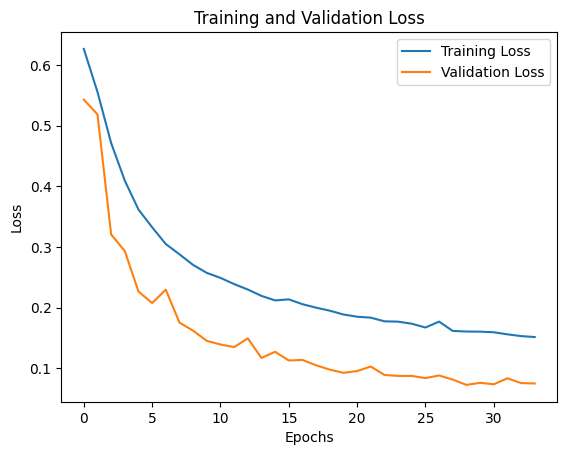

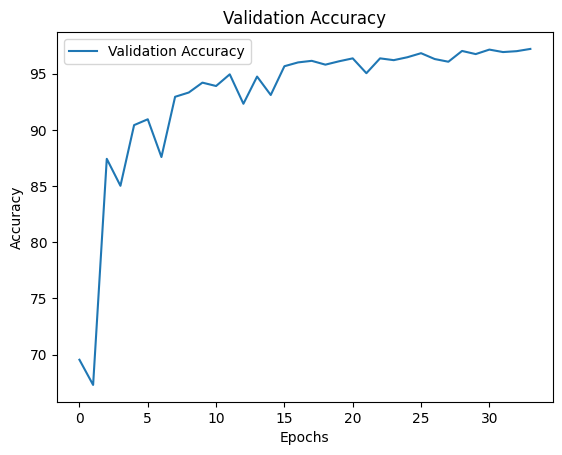

CPU times: user 7h 47min 27s, sys: 21min 50s, total: 8h 9min 18s
Wall time: 6h 59min 56s


In [15]:
%%time

epoch_number = 50

# Model definition
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = KANVGG16().to(device)
print(model)
summary(model, input_size=(3, 224, 224))

# Use DataParallel if using more than one GPU
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

# Print model parameter details
def print_parameter_details(model):
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()} {'requires_grad' if param.requires_grad else 'frozen'}")

print_parameter_details(model)

# Visualize KAN parameters
def visualize_kan_parameters(kan_layer, layer_name):
    base_weights = kan_layer.base_weight.data.cpu().numpy()
    plt.hist(base_weights.ravel(), bins=50)
    plt.title(f"Distribution of Base Weights - {layer_name}")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.show()
    if hasattr(kan_layer, 'spline_weight'):
        spline_weights = kan_layer.spline_weight.data.cpu().numpy()
        plt.hist(spline_weights.ravel(), bins=50)
        plt.title(f"Distribution of Spline Weights - {layer_name}")
        plt.xlabel("Weight Value")
        plt.ylabel("Frequency")
        plt.show()

# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # Added weight decay
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, steps_per_epoch=len(train_loader), epochs=epoch_number)

# Training function
def train(model, train_loader, criterion, optimizer, device, epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)  # Penyesuaian di sini
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(inputs)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

        # Clear CUDA cache
        torch.cuda.empty_cache()

    return running_loss / len(train_loader)

# Validation function
# Validation function with batch progress display
def validate(model, val_loader, criterion, device, epoch):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(val_loader):
            inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)  # Penyesuaian di sini
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels.squeeze()).sum().item()  # Sesuaikan perbandingan agar bekerja dengan dimensi yang sama

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.squeeze().cpu().numpy())

            if batch_idx % 10 == 0:
                print(f'Validation Epoch: {epoch} [{batch_idx * len(inputs)}/{len(val_loader.dataset)} ({100. * batch_idx / len(val_loader):.0f}%)]\tLoss: {loss.item():.6f}')

            # Clear CUDA cache
            torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    print(classification_report(all_labels, all_predictions))
    return val_loss / len(val_loader), accuracy

# Early stopping
best_val_loss = float('inf')
patience = 5
patience_counter = 0

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

# Input jumlah epoch
jumlah_epoch = epoch_number
for epoch in range(jumlah_epoch):
    train_loss = train(model, train_loader, criterion, optimizer, device, epoch)
    val_loss, val_accuracy = validate(model, val_loader, criterion, device, epoch)

    # Save losses and accuracy
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{jumlah_epoch}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}, Validation Accuracy: {val_accuracy:.2f}%")
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model_weights_KAN.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break
            
# Load the best model weights
model.load_state_dict(torch.load('best_model_weights_KAN.pth'))

# Evaluate model on validation set
def test(model, val_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

            # Clear CUDA cache
            torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    return accuracy

accuracy = test(model, val_loader, device)
print(f'Validation Accuracy: {accuracy:.2f}%')

# Plot training and validation loss
def plot_loss(train_losses, val_losses):
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Plot validation accuracy
def plot_accuracy(val_accuracies):
    plt.figure()
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()
    plt.show()

# Plot the losses and accuracy
plot_loss(train_losses, val_losses)
plot_accuracy(val_accuracies)

## 5. Evaluasi Model pada Data Test

In [16]:
"""
# Create the test dataset and loader
test_dir = '/tmp/test'
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

def test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

            # Kosongkan cache CUDA
            torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    return accuracy

accuracy = test(model, test_loader, device)
print(f'Test Accuracy: {accuracy}%')
"""

"\n# Create the test dataset and loader\ntest_dir = '/tmp/test'\ntest_dataset = datasets.ImageFolder(root=test_dir, transform=transform)\ntest_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)\n\ndef test(model, test_loader, device):\n    model.eval()\n    correct = 0\n    total = 0\n    with torch.no_grad():\n        for inputs, labels in test_loader:\n            inputs, labels = inputs.to(device), labels.to(device)\n            outputs = model(inputs)\n            predicted = (outputs > 0.5).float()\n            total += labels.size(0)\n            correct += (predicted.squeeze() == labels).sum().item()\n\n            # Kosongkan cache CUDA\n            torch.cuda.empty_cache()\n\n    accuracy = 100 * correct / total\n    return accuracy\n\naccuracy = test(model, test_loader, device)\nprint(f'Test Accuracy: {accuracy}%')\n"

## 6. Plot ROC Curve

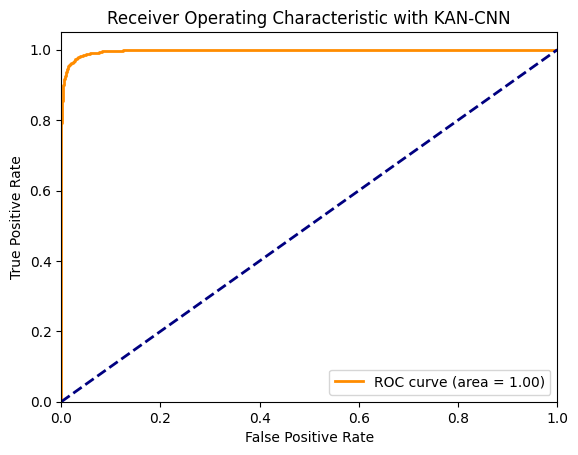

 
Accuracy: 0.9702
Precision: 0.9757
Recall: 0.9644
F1 Score: 0.9700
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97      2500
     Class 1       0.98      0.96      0.97      2500

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, precision_score, recall_score, f1_score
import torch

# Function to calculate predictions and true labels
def get_predictions_and_labels(model, val_loader, device):
    model.eval()
    preds = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return np.array(preds), np.array(true_labels)

# Function to plot ROC Curve
def plot_roc_curve(true_labels, preds):
    fpr, tpr, _ = roc_curve(true_labels, preds)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic with KAN-CNN')
    plt.legend(loc="lower right")
    plt.show()

# Function to calculate and print classification metrics
def print_classification_metrics(true_labels, preds):
    preds_binary = (preds >= 0.5).astype(int) # Threshold for binary classification
    accuracy = accuracy_score(true_labels, preds_binary)
    precision = precision_score(true_labels, preds_binary)
    recall = recall_score(true_labels, preds_binary)
    f1 = f1_score(true_labels, preds_binary)
    report = classification_report(true_labels, preds_binary, target_names=['Class 0', 'Class 1'])

    print(" ")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Classification Report:')
    print(report)

# Assuming you have your model, val_loader, and device already defined
# Example usage
preds, true_labels = get_predictions_and_labels(model, val_loader, device)
plot_roc_curve(true_labels, preds)
print_classification_metrics(true_labels, preds)


## Making Prediction

Code Colab: https://colab.research.google.com/drive/1h-a2_EvDZYKawcH847a3kj7gyujWsQPR?usp=sharing

In [ ]:
# Tentukan device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definisikan transformasi gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(img_bytes):
    img = Image.open(BytesIO(img_bytes)).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img, img_tensor

# Define the model
class KANVGG16(nn.Module):
    def __init__(self, num_classes=1):  # For binary classification (cats and dogs)
        super(KANVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),  # Added Batch Normalization

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(128),  # Added Batch Normalization

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(256),  # Added Batch Normalization

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),  # Added Batch Normalization

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),  # Added Batch Normalization
        )
        self.classifier = nn.Sequential(
            KANLinear(512 * 7 * 7, 2048),  # Adjusted for input size 224x224
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Increased Dropout
            KANLinear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Increased Dropout
            KANLinear(2048, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Membuat instance model
model = KANVGG16().to(device)

# Memuat state_dict dari file dengan penyesuaian nama parameter
def load_state_dict_adjusted(model, state_dict_path):
    state_dict = torch.load(state_dict_path, map_location=device)
    new_state_dict = {}
    for k, v in state_dict.items():
        if k.startswith('module.'):
            new_state_dict[k[len('module.'):]] = v
        else:
            new_state_dict[k] = v
    model.load_state_dict(new_state_dict)

model_path = '/kaggle/working/best_model_weights_KAN.pth'  # Ganti dengan path model Anda
load_state_dict_adjusted(model, model_path)

# Fungsi untuk melakukan prediksi dan menampilkan gambar
def predict_and_display(img, img_tensor):
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.sigmoid(output).cpu().numpy().flatten()
    plt.imshow(np.array(img))
    plt.axis('off')
    prediction_text = f"Probabilitas: {prob[0]:.4f}\n"
    prediction_text += "This is a cat" if prob[0] < 0.5 else "This is a dog"
    plt.title(prediction_text)
    plt.show()

# Fungsi untuk menangani pengunggahan file
def handle_upload():
    uploaded = files.upload()
    for name, data in uploaded.items():
        img, img_tensor = load_and_preprocess_image(data)
        predict_and_display(img, img_tensor)

# Memanggil fungsi untuk menangani pengunggahan file
handle_upload()

## Result prediction in colab

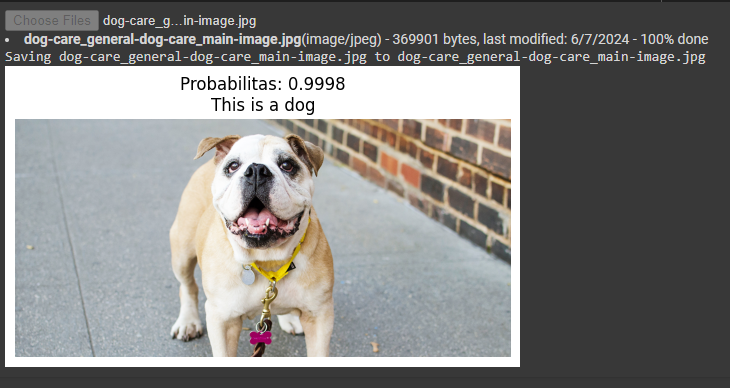

## Download the Model

In [20]:
!cd /kaggle/working/

In [21]:
!ls

best_model_weights_KAN.pth  split_data


In [22]:
from IPython.display import FileLink 
FileLink(r'best_model_weights_KAN.pth')

/kaggle/working/best_model_weights_KAN.pth